# The Report

# Münster: Energy and Greenhouse Gas Balance 1990 – 2021


## Introduction:
Münster, the city of science and learning, Westphalian Peace, the capital city of bicycles, and Germany's Climate Protection Capital. Achieving climate neutrality for the city of Münster is a very big challenge and requires a significant intensification and, above all, acceleration of the activities, measures and processes of all actors in the area of ​​climate protection.

The energy and climate protection assessment of Münster offers insights into the city's energy consumption and related greenhouse gas emissions. It records all sectors, including  transport, households, commerce, and industry. 

This report offers an in-depth analysis on both consumption and co2 emissions. Also it emphasizes the renewable energy production trends over time. Utilizing publicly available datasets from openopendata.stadt-muenster.de and the Python programming language to find out "How can Münster enhance its sustainable urban development strategies, focusing on reducing CO2 emissions and reinforcing renewable energy production?"

As part of ongoing efforts to address this critical issue, this report employs the Autoregressive Integrated Moving Average (ARIMA) model as a powerful tool for time series forecasting. By leveraging the capabilities of ARIMA, gainful insights into the trends and patterns of CO2 emissions over time could be obtained.




## Methods: 
 The analysis will focus on two key aspects: the development of annual CO2 emissions and the status of renewable electricity and heat production. The primary goal is to explore how promoting cleaner energy sources benefits the environment. 

The Work Packages: 
1. Loading the datasets into Pandas dataframe. 

2. Preprocessing: Clean, format, and prepare the dataset for analysis. This includes handling missing values, ensuring data consistency, and structuring the data for further investigation.

3. Integration: Develop a data integration plan to combine the renewable energy production dataset and CO2 emissions development in Münster. 

4. Exploring:  Gain insights into the datasets to understand trends and patterns. Examine the relationships between renewable energy production dataset and CO2 emissions development.  

5. Analysis: Using Machine Learning for in-depth insights.  
   
6. Generate insights: Provide recommendations for policymakers and energy planners based on the analysis.  

7. Reporting: summarizing findings and insights from the analyses. Present results in a clear and accessible format. Document the data sources, methodologies, and results. 
 


#### 1. Importing the required libraries and installing dependencies:



In [515]:
#!/usr/bin/env python3.11
# -*- coding: utf-8 -*-
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns



In [516]:
# Adjust display options for NumPy arrays

pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=np.inf)


#### 2. Loading the datasets:


In [517]:
#print("Loadin Renewable Energy of the city of Münster in the years 1990-2020 data....")
#download data from here:https://opendata.stadt-muenster.de/sites/default/files/Muenster-Erneuerbare-Energien_2020.xls
renewable_energyـurl = "https://opendata.stadt-muenster.de/sites/default/files/Muenster-Erneuerbare-Energien_2020.xls" # 
renewable_energy = pd.read_excel(renewable_energyـurl, sheet_name=None)
  

#print("Loadin CO2 emissions of the city of Münster in the years 1990-2021 data....")
        #download data from here: https://opendata.stadt-muenster.de/sites/default/files/Muenster-CO2-Emissionen_2021.xls
co2_emissions_url = "https://opendata.stadt-muenster.de/sites/default/files/Muenster-CO2-Emissionen_2021.xls" # 
co2_emissions = pd.read_excel(co2_emissions_url, sheet_name=None) # to add all the three  sheets  into CO2emissions,  because it loads the first one by default.


### Renewable_energy dataset:

Renewable energy, obtained from ever-replenishing resource such as the sun and wind. 

While Non-renewable energy, derived from finite sources like coal and oil that may eventually be depleted.

The renewable_energy dataset contains the data on the production of **electricity** and **heat** through renewable energy resources in years 1990-2020 in the city of Münster. The main sources for renewable energy are:

Photovoltaik which involves converting sunlight into electricity.

<img src="/pictures/photovoltaik.jpeg" alt="Photovoltaik" width="400"/>

Wind power that harnesses the power of wind to generate electricity through turbines.

<img src="/pictures/windpark.jpeg" alt="windpark" width="400"/>

Hydropower utilizes the movement of water to generate electricity.

<img src="/pictures/wasserkraft-hauptbild.jpeg" alt="wasserkraft-hauptbild" width="400"/>

Sewage/landfill gas is the gas byproduct from sewage treatment and landfills.

<img src="/pictures/landfill.jpeg" alt="landfill" width="400"/>

Biomethan is methane derived from organic materials.

<img src="/pictures/Biogasanlage.jpeg" alt="Biogasanlage" width="350"/> <img src="/pictures/biomasse.jpeg" alt="biomasse" width="350"/>

Heat pumps are electrical devices transferring heat between locations.

<img src="/pictures/heatbump.jpeg" alt="heatbump" width="400"/>

Pellets are compressed wood chips used as a fuel source.

<img src="/pictures/wood.jpeg" alt="wood" width="400"/>   

Firewood refers to firewood that is cut and prepared in log form.

<img src="/pictures/firewood.jpeg" alt="firewood" width="400"/>   




## CO2  Emissions dataset:

CO2 emission is the production of carbon dioxide, which is a powerful greenhouse gas. It is produced by the burning of materials that contain carbon, such as wood, coal, diesel or gas.
Huge consumption of these materials means emitting  massive amounts of CO2 which leads to global warming.

The co2_emissions dataset contains insights about the **CO2 emissions** (final energy consumption) of the city of Münster in  years 1990-2021. It is divided into three sheets based on the sector (private households, industry, transport, commercial + other), application (heat, electricity, transport) or by energy source (natural gas, district heating, heating oil, coal, fuel mix, transport, electricity, other).


Now, let us have a close look into the datasets.

#### 3. Preprocessing and Integration: 

Clean, format, and prepare the dataset for analysis. This includes handling missing values, ensuring data consistency, and structuring the data for further investigation. Then, initiate a data integration plan to combine the renewable energy production dataset and CO2 emissions development.

In [518]:
#### The first dataset renewable_energy 

renewable_energy_electricity = pd.read_excel(renewable_energyـurl, sheet_name=0) # the first sheet contains the data that describes the production of *electricity* through renewable energy.
renewable_energy_electricity= renewable_energy_electricity.rename(columns={'Erneuerbare Stromproduktion nach Technologie in (MWh)': 'year'} ) #rename for later merging   

renewable_energy_heat = pd.read_excel(renewable_energyـurl, sheet_name=1) #the second sheet contains the data that describes the production of *heat* through renewable energy.
renewable_energy_heat= renewable_energy_heat.rename(columns={'Erneuerbare Wärmeproduktion nach Technologie in (MWh)': 'year'} ) #rename for later merging   

# merge the data of the renewable_energy_electricity and renewable_energy_heat 
renewable_energy = pd.merge(renewable_energy_electricity, renewable_energy_heat,  on='year' ) #merge the two exel sheets into one datafram.

#rename and translate columns
renewable_energy.rename(columns={
    'year': 'year',
    'Photovoltaik': 'Photovoltaic',
    'Windkraft': 'Wind power',
    'Wasserkraft': 'Hydropower',
    'Biogasanlagen_x': 'Biogas plants in electricity',
    'Klär- / Deponiegas_x': 'Sewage / landfill gas in electricity',
    'Biomethan_x': 'Biomethane in electricity',
    'Gesamt EE': 'Total RE in electricity',
    'Solarthermie': 'Solar thermal',
    'Wärmepumpen': 'Heat pumps',
    'Pellets': 'Pellets',
    'Stückholz': 'Firewood',
    'Biogasanlagen_y': 'Biogas plants in heat',
    'Klär- / Deponiegas_y': 'Sewage / landfill gas in heat',
    'Biomethan_y': 'Biomethane in heat',
    'Gesamt': 'Total RE in heat',
}, inplace=True)

#Cleaning data and replacing missing values
renewable_energy.fillna(0, inplace=True)
renewable_energy['Total RE production'] = renewable_energy[['Total RE in electricity','Total RE in heat']].sum(axis=1) 

######################################### 

 

In [519]:
renewable_energy.head(15)

,year,Photovoltaic,Wind power,Hydropower,Biogas plants in electricity,Sewage / landfill gas in electricity,Biomethane in electricity,Total RE in electricity,Solar thermal,Heat pumps,Pellets,Firewood,Biogas plants in heat,Sewage / landfill gas in heat,Biomethane in heat,Total RE in heat,Total RE production
0,1990,0.00000,63.20,239.8,0.0,0.00,0,303.00000,24.840,42.96875,0.0,0.0,0.000,0.00,0,67.80875,370.80875
1,1995,28.01120,63.20,239.8,0.0,0.00,0,331.01120,349.140,195.31250,0.0,0.0,0.000,0.00,0,544.45250,875.46370
2,2000,482.53884,63.20,239.8,0.0,11850.00,0,12635.53884,1852.420,347.65625,12.5,0.0,0.000,15000.00,0,17212.57625,29848.11509
3,2005,2637.63906,21804.00,239.8,0.0,11850.00,0,36531.43906,4110.660,500.00000,487.5,495.0,1237.700,15000.00,0,21830.86000,58362.29906
4,2010,16953.45818,22815.20,436.0,16417.4,11850.00,0,68472.05818,8827.300,8277.50000,2712.5,2370.0,14649.420,15000.00,0,51836.72000,120308.77818
5,2015,36430.82880,34406.08,436.0,44952.2,12290.20,14816,143331.30880,10670.060,14890.00000,3812.5,3810.0,37828.736,7570.27,21963,100544.56600,243875.87480
6,2016,37358.18730,34456.64,436.0,44952.2,15708.24,23218,156129.26730,10944.818,15617.00000,3950.0,4033.8,37828.736,10762.24,31864,115000.59400,271129.86130
7,2017,39083.18440,55059.84,436.0,44952.2,15414.22,12059,167004.44440,11078.678,16492.00000,4075.0,4078.8,37828.736,8370.43,19457,101380.64400,268385.08840
8,2018,42910.06126,60545.60,436.0,44952.2,15617.32,20490,184951.18126,11217.598,17531.50000,4212.5,4168.2,37828.736,8043.99,26793,109795.52400,294746.70526
9,2019,47745.49056,60545.60,436.0,44952.2,15617.32,17479,186775.61056,11396.998,18731.50000,4275.0,4641.9,37828.736,7740.00,22673,107287.13400,294062.74456


In [520]:
renewable_energy.set_index('year', inplace=True)


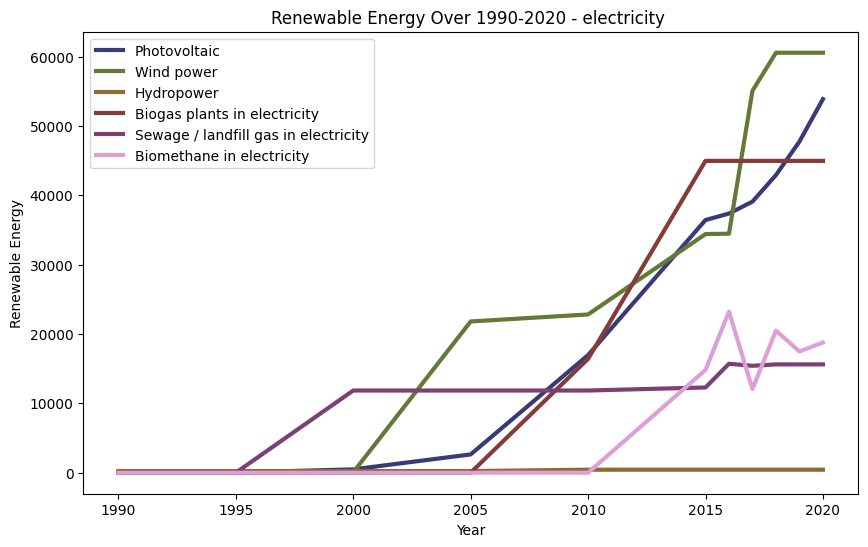

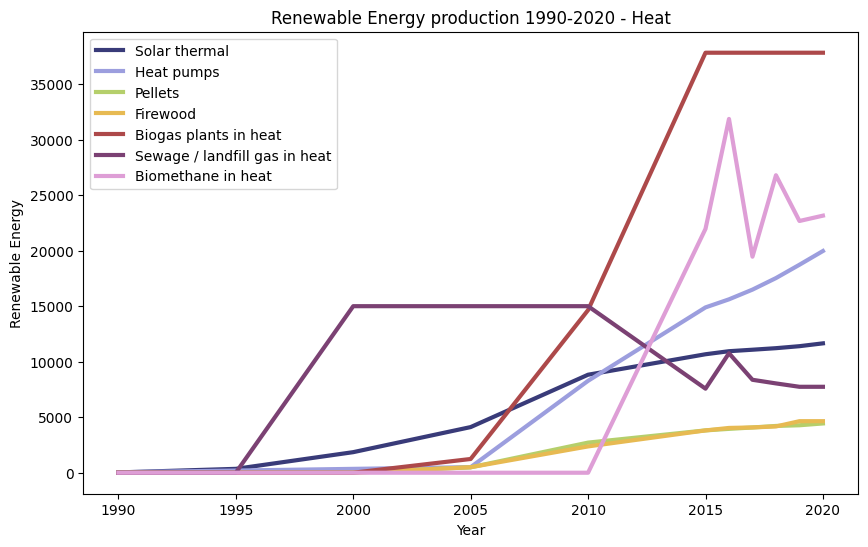

In [521]:

# plot  

#  The columns for the first and second pictures
columns_electricity = ['Photovoltaic', 'Wind power', 'Hydropower', 'Biogas plants in electricity',
                      'Sewage / landfill gas in electricity', 'Biomethane in electricity']

columns_heat = ['Solar thermal', 'Heat pumps', 'Pellets', 'Firewood',
                       'Biogas plants in heat', 'Sewage / landfill gas in heat', 'Biomethane in heat']

# Plotting the columns_electricity picture
renewable_energy[columns_electricity].plot(
    
    kind='line',
    figsize=(10, 6),
    colormap='tab20b',
    linewidth=3,
    title='Renewable Energy Over 1990-2020 - electricity ',
)

# Set labels
plt.xlabel('Year')
plt.ylabel('Renewable Energy')

# Show the first plot
plt.show()

# Plotting the columns_heat picture
renewable_energy[columns_heat].plot(
    kind='line' ,
    figsize=(10, 6),
    colormap='tab20b',
    linewidth=3,
    title='Renewable Energy production 1990-2020 - Heat',
)

# Set labels
plt.xlabel('Year')
plt.ylabel('Renewable Energy')

# Show the second plot
plt.show()



In [522]:
renewable_energy.reset_index('year', inplace=True)


In [523]:
#### The second dataset co2 emissions  


#store each sheet in a data frame >>>  then creat a new CO2emissions data frame from these data frames (merge them!):
co2_emissions_sectors  = pd.read_excel(co2_emissions_url, sheet_name=0) # the first sheet (at 0) define CO2emissions by sectors
co2_emissions_sectors =co2_emissions_sectors.rename(columns={'CO2-Emissionen nach Sektoren in (t)': 'year'} ) #rename the CO2-Emissionen nach Sektoren column into >>> year. This step for merge the two dataframes alnog the "year" column


co2_emissions_applications = pd.read_excel(co2_emissions_url, sheet_name=1)# the second sheet (at 1) define CO2emissions by application
co2_emissions_applications =co2_emissions_applications.rename(columns={'CO2-Emissionen nach Anwendungen in (kt)': 'year'} ) #rename the CO2-Emissionen nach Anwendungen column into >>> year 

# merge the data of the CO2emissions_sectors and CO2emissions_applications 
co2_emissions = pd.merge(co2_emissions_sectors, co2_emissions_applications,  on='year' ) #merge the two exel sheets into one datafram. cO2_emissions_applications.index.name = 'CO2 emissions according to applications in (KT)' # put the dataset topic in the first(index) column


### process the merged dataFrame CO2emissions   
co2_emissions.rename(columns={
    'year': 'year',
    'Private Haushalte': 'Private households',
    'Gewerbe + Sonstiges': 'Trade and others',
    'Industrie': 'Industry',
    'Verkehr_x':'Transport',
    'Wärme': 'Heat', # Kt >> convert to t!!
    'Strom': 'Electricity', # Kt!!
    'Gesamt_y': 'Total_co2', # Kt and update to the new values!!
    'Gesamt in % zu 1990': 'Total as of 1990'  # update to the new values!!
     }    ,inplace=True)


 # Drop the unnesseciry columns   columns 
co2_emissions = co2_emissions.drop(columns=[col for col in ['Verkehr in %', 'Gesamt_x', 'Wärme in %', 'Strom in %', 'Verkehr_y'] if col in co2_emissions.columns], axis=1)

co2_emissions['Heat']= co2_emissions['Heat']*1000
co2_emissions['Electricity'] = co2_emissions['Electricity']*1000
co2_emissions['Total_co2'] = co2_emissions.iloc[:, 1:-2].sum(axis=1)
co2_emissions['Total as of 1990'] = ((co2_emissions['Total_co2'] - co2_emissions['Total_co2'].iloc[0]) / co2_emissions['Total_co2'].iloc[0]) 


#Cleaning data and replacing missing values
co2_emissions.fillna(0, inplace=True)
#######################################################

In [524]:
co2_emissions.head(50)

,year,Private households,Trade and others,Industry,Transport,Heat,Electricity,Total_co2,Total as of 1990
0,1990,817146.280496,846374.365518,293939.743986,660748.806226,1.120973e+06,836487.800000,4.575670e+06,0.000000
1,1995,774039.745963,801725.975522,278433.678515,649866.500561,1.055941e+06,798258.216000,4.358265e+06,-0.047513
2,2000,773328.016727,800988.788810,278177.658859,638984.194897,1.058948e+06,793546.832000,4.343973e+06,-0.050637
3,2005,806450.639618,835296.157763,290092.361925,628101.889233,9.614061e+05,970433.036634,4.491780e+06,-0.018334
4,2010,684161.375550,735889.940880,185496.828653,622684.731430,7.880783e+05,817469.875512,3.833781e+06,-0.162138
5,2015,636894.098977,629441.403926,217637.183252,596134.946082,7.446007e+05,739371.946216,3.564080e+06,-0.221080
6,2016,607277.947909,632025.211201,214250.898995,598972.703684,7.553259e+05,698228.112507,3.506081e+06,-0.233756
7,2017,578793.984793,623804.379543,215604.505102,593667.548910,7.686083e+05,649594.561599,3.430073e+06,-0.250367
8,2018,588419.949975,592654.296510,232468.641927,588925.588842,7.778818e+05,635661.057120,3.416011e+06,-0.253440
9,2019,533848.636234,549176.926239,225833.358416,582527.299609,7.073147e+05,601544.172097,3.200245e+06,-0.300595


In [525]:
co2_emissions.set_index('year' , inplace=True)


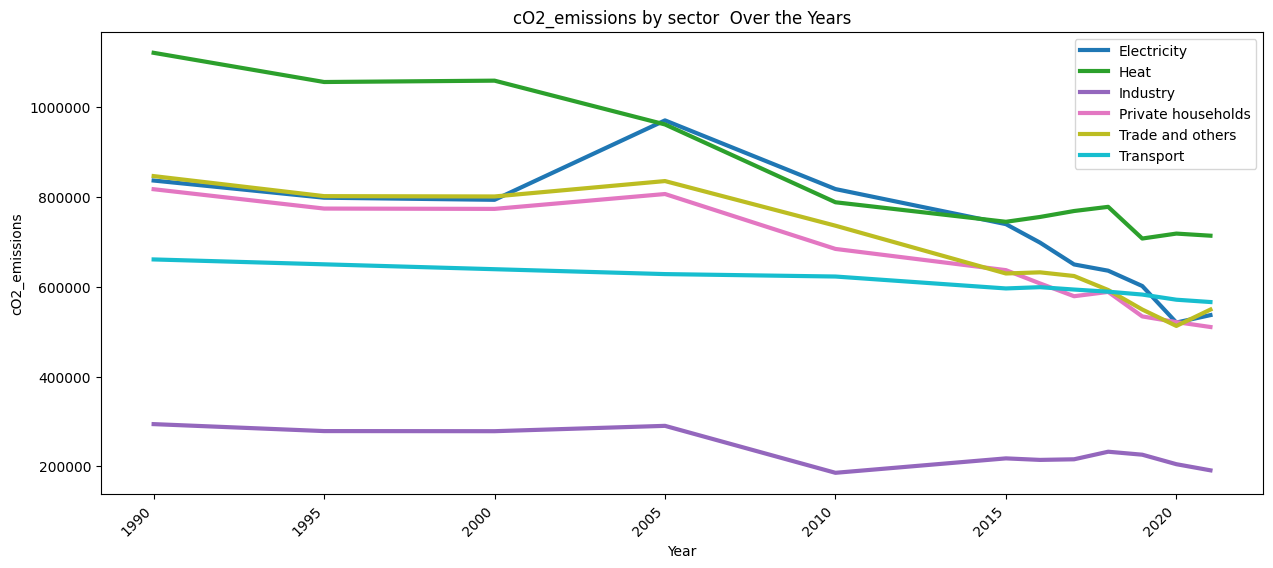

In [526]:
# Plotting
exclude = ['Total_co2',	'Total as of 1990']

co2_emissions.loc[:, co2_emissions.columns.difference(exclude)].plot(
    kind='line',
    figsize=(15, 6),
    colormap='tab10',
    linewidth=3,
    title='cO2_emissions by sector  Over the Years',
)

# Set labels
plt.xlabel('Year')
plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle and alignment for clear representation

plt.ylabel('cO2_emissions')
plt.ticklabel_format(axis='y', style='plain')
# Show the plot
plt.show()

In [527]:
co2_emissions.reset_index('year' , inplace=True)


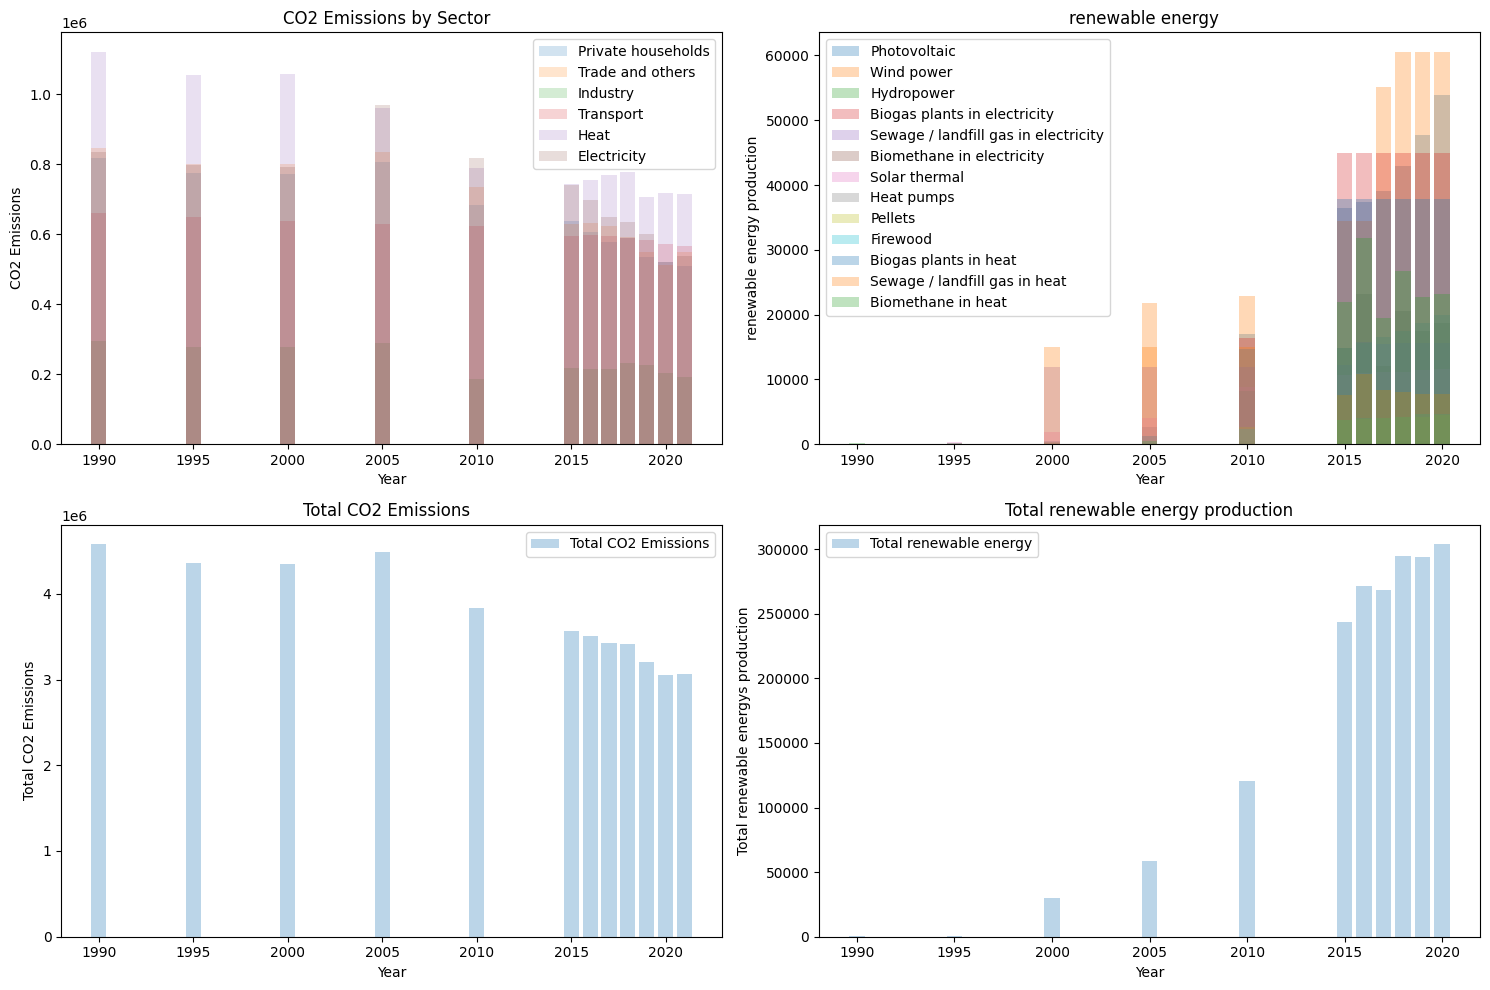

In [528]:
### plot all 


# The columns to plot 
co2_emissions_clms_to_plot =  ['Private households', 'Trade and others', 'Industry','Transport', 'Heat', 'Electricity']

renewable_energy_clms_to_plot = ['Photovoltaic', 'Wind power', 'Hydropower',
       'Biogas plants in electricity', 'Sewage / landfill gas in electricity',
       'Biomethane in electricity' , 'Solar thermal',
       'Heat pumps', 'Pellets', 'Firewood', 'Biogas plants in heat',
       'Sewage / landfill gas in heat', 'Biomethane in heat']

 

# 
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot for co2   
for idx, sector in enumerate(co2_emissions_clms_to_plot):
    axs[0, 0].bar(co2_emissions['year'], co2_emissions[sector], label=sector,   alpha=0.2)

axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('CO2 Emissions')
axs[0, 0].set_title(f'CO2 Emissions by Sector  ')
axs[0, 0].legend()


# Plot for renwable 
for idx, sector in enumerate(renewable_energy_clms_to_plot):
    axs[0, 1].bar(renewable_energy['year'], renewable_energy[sector], label=sector, alpha=0.3)

axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('renewable energy production')
axs[0, 1].set_title(f'renewable energy  ')
axs[0, 1].legend()

# Plot Total CO2 Emissions
axs[1, 0].bar(co2_emissions['year'], co2_emissions['Total_co2'], label='Total CO2 Emissions', alpha=0.3)

axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Total CO2 Emissions')
axs[1, 0].set_title(f'Total CO2 Emissions  ')
axs[1, 0].legend()

# Plot for Total renewable energys
axs[1, 1].bar(renewable_energy['year'], renewable_energy['Total RE production'], label='Total renewable energy', alpha=0.3)

axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Total renewable energys production')
axs[1, 1].set_title(f'Total renewable energy production')
axs[1, 1].legend()

plt.tight_layout()
plt.show()


As shown in the graph, there is a significant renewable energy increase over the years espesiaally, windpower and hydropower indicating a growing reliance on these renewable sources.

Biomethane in electricity and solar thermal also show an increasing trend.
The total renewable energy production has substantially increased from 1990 to 2020.


On the other hand, There's a noticeable decrease in total CO2 emissions from 1990 to 2020, indicated by the negative values in the "Total as of 1990" column. The "Total_co2" column represents the total CO2 emissions from all sectors, and it also shows a decreasing trend.


The increase in renewable energy production aligns with efforts to reduce CO2 emissions, as evidenced by the decreasing trend in total CO2 emissions.
 

In [529]:
 #### THe third dataset co2 emissions by energy source

co2_emissions_energy_source = pd.read_excel(co2_emissions_url, sheet_name=2)# the third sheet (at 2) define CO2emissions by energy source

#rename and translate the columns 
column_mapping = {
    'CO2 Emissionen nach Energieträgern und Sektoren in 2021 in (t)':"CO2 Emissions by Energy Source and Sector (2021)",
    'Erdgas': 'Natural Gas',
    'Fernwärme': 'District Heating',
    'Heizöl': 'Heating Oil',
    'EE Wärme': 'Renewable Heat',
    'Kraftstoffmix Verkehr': 'Fuel Mix Traffic',
    'Strom': 'Electricity',
    'Summe': 'Total',
    'Anteil': 'Share'
}
# Rename columns
co2_emissions_energy_source.rename(columns=column_mapping, inplace=True)
co2_emissions_energy_source.set_index('CO2 Emissions by Energy Source and Sector (2021)', inplace=True)

# rename and translate the rows 
index_mapping = {
    'Private Haushalte': 'Private households',
    'Gewerbe+Sonstiges': 'Trade+Other',
    'Industrie': 'Industry',
    'Verkehr': 'Traffic',
    'Summe': 'Total',
    'Anteil': 'Share'
}

# Rename index (rows)
co2_emissions_energy_source.rename(index=index_mapping, inplace=True)


#Cleaning data and replacing missing values
co2_emissions_energy_source.fillna(0, inplace=True)



In [530]:
co2_emissions_energy_source

,Natural Gas,District Heating,Heating Oil,Renewable Heat,Fuel Mix Traffic,Electricity,Total,Share
CO2 Emissions by Energy Source and Sector (2021),,,,,,,,
Private households,238981.296226,11415.403694,98807.497200,1052.187099,0.000000,159997.920038,5.102543e+05,0.280946
Trade+Other,120189.234076,85194.803281,36684.480000,348.860810,0.000000,306686.890631,5.491043e+05,0.302337
Industry,107276.177189,0.000000,1630.827765,0.000000,0.000000,82073.433626,1.909804e+05,0.105154
Traffic,0.000000,0.000000,0.000000,0.000000,549780.000000,16082.000000,5.658620e+05,0.311564
Total,466446.707492,96610.206975,137122.804965,1401.047909,549780.000000,564840.244295,1.816201e+06,1
Share,0.256825,0.053194,0.075500,0.000771,0.302709,0.311001,1.000000e+00,-


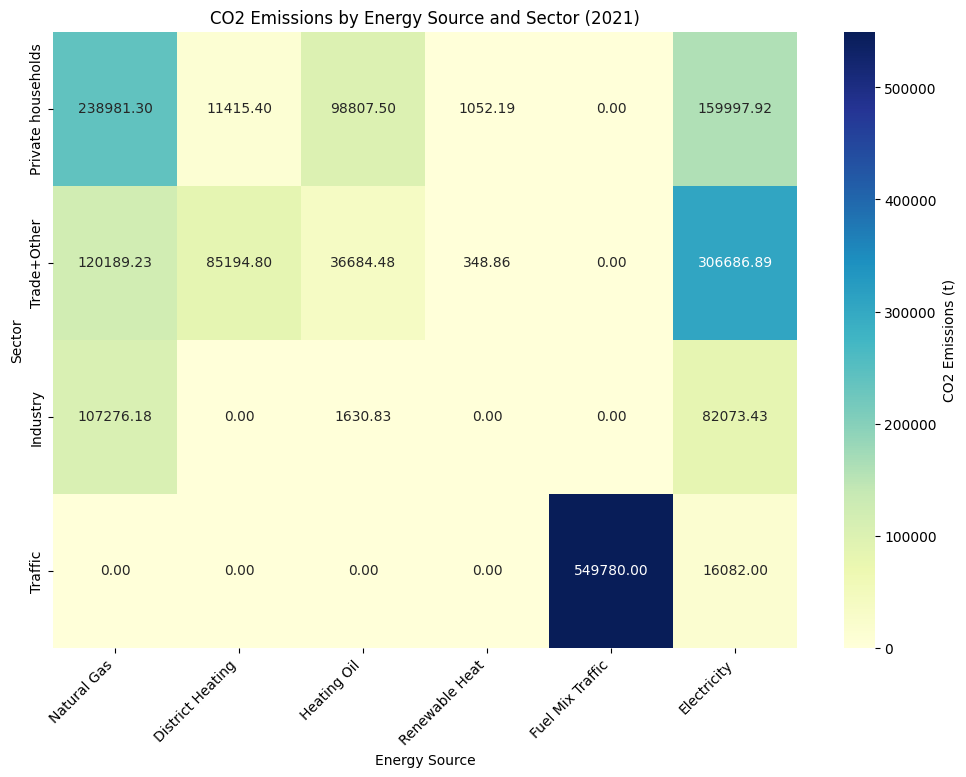

In [531]:
###plot heat map
 
# Select relevant rows and columns for the heatmap
data_to_heatmap = co2_emissions_energy_source.iloc[0:4, 0:-2]  # Select rows 0 to 3 and columns 1 to -2 (excluding the last column)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_to_heatmap, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'CO2 Emissions (t)'})

# Set labels and title
plt.title('CO2 Emissions by Energy Source and Sector (2021)')
plt.xlabel('Energy Source')
plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle and alignment as needed
plt.ylabel('Sector')

# Show the plot
plt.show()


The heat map represents the CO2 Emissions by Sector and Energy Source:

**Private households** sector contributes a high share of CO2 emissions (28%). The major sources include natural gas, district heating, heating oil, and electricity. After that, **trade** with (30.2%). Similar to private households, it shows significant emissions from natural gas, district heating, heating oil, and electricity. Then, **Industry** contributes 10.5% of total CO2 emissions. The primary sources are natural gas and electricity. Finally, The **traffic** sector includes fuel mix traffic and electricity, accounts for 31.2% of CO2 emissions. Notably, it has the highest share.



Regarding CO2 Emissions by Energy Source,  **Natural Gas** contributes a significant amount (25.7% of total emissions), with major contributions from private households, trade, and industry. After that, **District Heating** represents 5.3% of total emissions, mainly from private households and trade. Then, **Heating Oil** contributes 7.6%, primarily from private households and trade. Besides that, **Renewable Heat** is the  minimal contributor, mainly from private households. In addition, **Fuel Mix Traffic** is a considerable contributor with(30.3%), primarily from the traffic sector. Finally, **Electricity** represents 31.1%, with substantial contributions from all of the sectors.

In [532]:
#Creating SQLite files
print("Creating CO2 Emissions Energy and Renewable Energy SQLite files: ")
sqlite_path = '../data/co2_emissions_renewable_energy.sqlite'
engine = create_engine(f'sqlite:///{sqlite_path}')

print("creating CO2 Emissions data table ...")
co2_emissions.to_sql("co2_emissions_table", engine, if_exists='replace', index=False)
   
     
print("creating Renewable Energy data table...")
renewable_energy.to_sql("renewable_energy_table", engine ,if_exists='replace', index=False)

print("creating CO2 Emissions by Energy Source data table...")
co2_emissions_energy_source.to_sql("co2_emissions_energy_source_table", engine ,if_exists='replace', index=True)# index=True

 
    
print("SQLite files created successfully!!!")

Creating CO2 Emissions Energy and Renewable Energy SQLite files: 
creating CO2 Emissions data table ...
creating Renewable Energy data table...
creating CO2 Emissions by Energy Source data table...
SQLite files created successfully!!!


## 2. Time Series Forecasting

In this section, **co2_emissions** dataset is extended by reindexing it to cover the years from 1990 to 2020. It is important to note that this modification alters the original dataset, so **co2_emissions_extended** dataset is not accurate.


The Box-Jenkins model assumes that the time series is stationary. Doing so produces an ARIMA model.
The Box-Jenkins ARMA model is a combination of the AR (autoregressive) and MA (moving average) models with the "I" standing for "Integrated". It provides a systematic and powerful framework for time series forecasting.


The main goal in this section is to explore ARIMA model applications for time series forcasting. And to compare its performance in different situations.




####   Co2 Emissions processing:

In [533]:
from googletrans import Translator
from datetime import datetime 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
from math import sqrt
 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [534]:
# Extend the co2_emissions dataset to cover each year in 1990 - 2021
co2_emissions_extended = co2_emissions  #copy co2_emissions 
co2_emissions_extended.set_index('year' , inplace=True)
co2_emissions_extended= co2_emissions.reindex(range(1990, 2021)) # extend the datset

The structure of **co2_emissions_extended** dataset after extension:

In [535]:
co2_emissions_extended.head(50)

,Private households,Trade and others,Industry,Transport,Heat,Electricity,Total_co2,Total as of 1990
year,,,,,,,,
1990,817146.280496,846374.365518,293939.743986,660748.806226,1.120973e+06,836487.800000,4.575670e+06,0.000000
1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995,774039.745963,801725.975522,278433.678515,649866.500561,1.055941e+06,798258.216000,4.358265e+06,-0.047513
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [536]:
co2_emissions_extended.index = pd.to_datetime(co2_emissions_extended.index, format='%Y') #convert the index to time object

Interpolation is a common technique to estimate missing values based on the values of neighboring data points. 
This approach is  useful to fill in missing years and create a continuous time series for analysis.


In [537]:
#interpolate missing values in the numeric columns (co2_emissions_extended).
 
numeric_columns = co2_emissions_extended.columns.difference(['year','Total','Total as of 1990' ] ) # drop unwanted columns

for column in numeric_columns:
    for index in range(26): 
        if pd.isnull(co2_emissions_extended[column].iloc[index]):
            co2_emissions_extended.interpolate(method='linear', inplace=True, limit_direction='both') #..
 

In [538]:
#drop Total as of 1990, it is not important in this section

column_to_drop = 'Total as of 1990' #to avoid The column does not exist error.
if column_to_drop in co2_emissions_extended.columns:
    co2_emissions_extended = co2_emissions_extended.drop([column_to_drop], axis=1)
    print(f"The column '{column_to_drop}' was dropped.")
else:
    print(f"The column '{column_to_drop}' does not exist.")
    
#update the dataframe to make sure the sum (total)  is accurate.
co2_emissions_extended['Total_co2'] = co2_emissions_extended.iloc[:, 1:-1].sum(axis=1)


The column 'Total as of 1990' was dropped.


The structure of **co2_emissions_extended** after Extention and Interpolation:

In [539]:
co2_emissions_extended

,Private households,Trade and others,Industry,Transport,Heat,Electricity,Total_co2
year,,,,,,,
1990-01-01,817146.280496,846374.365518,293939.743986,660748.806226,1.120973e+06,836487.800000,3.758523e+06
1991-01-01,808524.973589,837444.687519,290838.530892,658572.345093,1.107966e+06,828841.883200,3.723664e+06
1992-01-01,799903.666683,828515.009520,287737.317798,656395.883960,1.094960e+06,821195.966400,3.688804e+06
1993-01-01,791282.359776,819585.331521,284636.104703,654219.422827,1.081954e+06,813550.049600,3.653945e+06
1994-01-01,782661.052869,810655.653522,281534.891609,652042.961694,1.068947e+06,805904.132800,3.619085e+06
1995-01-01,774039.745963,801725.975522,278433.678515,649866.500561,1.055941e+06,798258.216000,3.584226e+06
1996-01-01,773897.400115,801578.538180,278382.474584,647690.039429,1.056542e+06,797315.939200,3.581509e+06
1997-01-01,773755.054268,801431.100837,278331.270653,645513.578296,1.057144e+06,796373.662400,3.578793e+06
1998-01-01,773612.708421,801283.663495,278280.066722,643337.117163,1.057745e+06,795431.385600,3.576077e+06


In [540]:
#co2_emissions_extended.index = co2_emissions_extended.index.to_period('Y')


#####   Data Transformation To Achieve Stationarity:

Now, to use ARIMA, it is important to perform some data transformation to achieve **Stationarity**. Common transformations include differencing and logarithmization. Another option is to use a non-stationary model, such as a random walk model, to forecast the time series.

For educational purposes, the chosen approach in this report involves applying the ARIMA model with different transformation techniques. A varity of transformations are applied on **Transport** column untill it become stationary (based on the statistical tests). in section 2.2  log transformation is applied into  the entire **co2_emissions_extended** dataset, although it did not enhance its **Stationarity**. Finally, the performance of ARIMA is evaluated in both cases.


### 2.1. Transport CO2 Emission Analysis:

This section involves analysis of the choosen column which is **Transport**. The following lines of code present an overall idea about the series.

In [541]:
transport_series = co2_emissions_extended["Transport"] #  
transport_series.head()

year
1990-01-01    660748.806226
1991-01-01    658572.345093
1992-01-01    656395.883960
1993-01-01    654219.422827
1994-01-01    652042.961694
Name: Transport, dtype: float64

In [542]:
transport_series.tail()

year
2016-01-01    598972.703684
2017-01-01    593667.548910
2018-01-01    588925.588842
2019-01-01    582527.299609
2020-01-01    571041.010283
Name: Transport, dtype: float64

To check Stationarity,  Augmented Dickey-Fuller (ADF) is applied. In addition to visualizations of each column. But only the ADF statistical test will be considered.

In [543]:
def test_stationary_plot(time_series , cutoff = 0.01):

    rol_mean = time_series.rolling(window = 10, center = False).mean()
    rol_std = time_series.rolling(window = 10, center = False).std()
    
    plt.plot(time_series, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
        
    time_series_test = adfuller(time_series , autolag = 'AIC')
    time_series_test_output = pd.Series(time_series_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    #print("column name:" , clm)
    for key,value in time_series_test[4].items():
        time_series_test_output['Critical Value (%s)'%key] = value
    print(time_series_test_output)
    
    if time_series_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print( "Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        
    
    plt.xlabel('Time in Years' )
    plt.ylabel('Total Emissions'  )
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation ')
    plt.show(block= True)
    
 

#### Data Transformation Examples:

A.  Moving average
In this technique, average of ‘k’ consecutive values depending on the frequency of time series is calculated .

Test Statistic                 -5.438410
p-value                         0.000003
#Lags Used                      9.000000
Number of Observations Used    20.000000
Critical Value (1%)            -3.809209
Critical Value (5%)            -3.021645
Critical Value (10%)           -2.650713
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


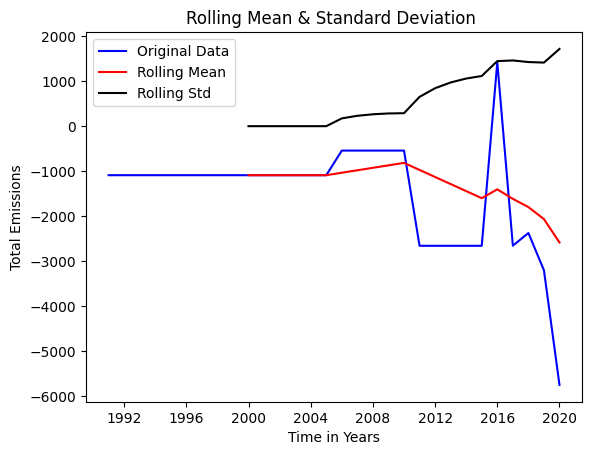

In [544]:
moving_avg = transport_series.rolling(2).mean()

mte_moving_avg_diff = transport_series - moving_avg
mte_moving_avg_diff.dropna(inplace=True)
test_stationary_plot(mte_moving_avg_diff)
#TestStationaryAdfuller(mte_moving_avg_diff) 


B. Differencing:
In this technique, the difference of the original observation at a particular instant with that at the previous instant is calculated. This mostly works well to improve stationarity. First order differencing can be done as follows:

Test Statistic                 -5.438410
p-value                         0.000003
#Lags Used                      9.000000
Number of Observations Used    20.000000
Critical Value (1%)            -3.809209
Critical Value (5%)            -3.021645
Critical Value (10%)           -2.650713
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


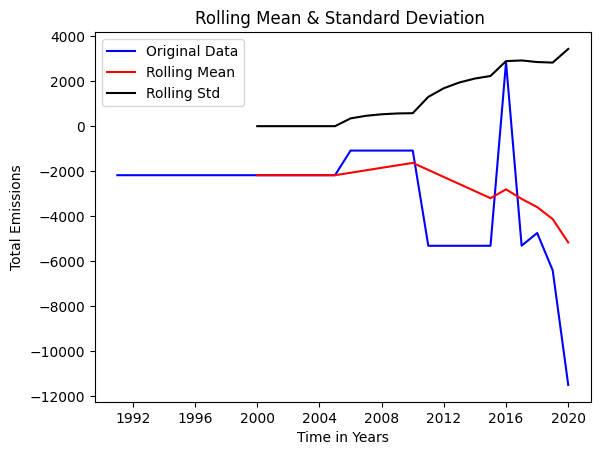

In [545]:
 
transport_series_first_difference =  transport_series - transport_series.shift(1)  
test_stationary_plot(transport_series_first_difference.dropna(inplace=False))
 


The first difference improves the stationarity of the series significantly. Let us use also the second difference to see how that impacts stationarity of the data.

Test Statistic                -6.971268e+00
p-value                        8.652562e-10
#Lags Used                     8.000000e+00
Number of Observations Used    2.000000e+01
Critical Value (1%)           -3.809209e+00
Critical Value (5%)           -3.021645e+00
Critical Value (10%)          -2.650713e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


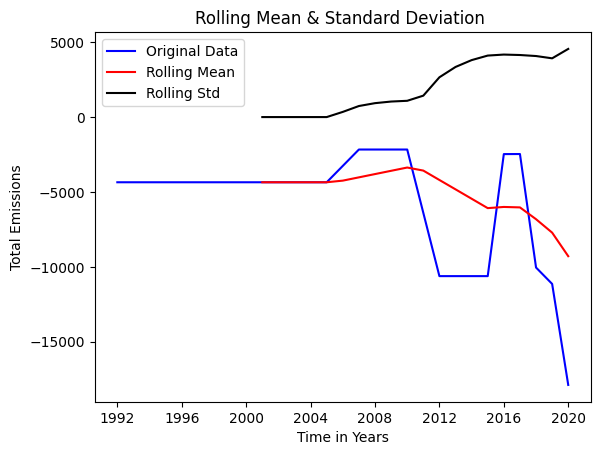

In [546]:
transport_series_second_difference = transport_series - transport_series.shift(2)  
test_stationary_plot(transport_series_second_difference.dropna(inplace=False))


The p-value now is much smaller, so, second difference has made the time series dataset stationary. It is also better than the third difference. This could be done using the following code as well: 


Test Statistic                -6.971268e+00
p-value                        8.652562e-10
#Lags Used                     8.000000e+00
Number of Observations Used    2.000000e+01
Critical Value (1%)           -3.809209e+00
Critical Value (5%)           -3.021645e+00
Critical Value (10%)          -2.650713e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


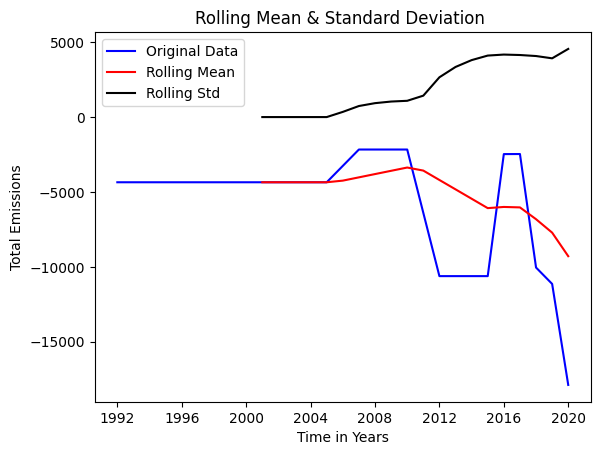

In [547]:
#***********
transport_series_diff = transport_series.diff(2).dropna()  # Differencing 1st or 2nd 
test_stationary_plot(transport_series_diff.dropna(inplace=False))
#************

C. Log:
Is used to transform data into a logarithmic scale particularly for data that exhibits exponential growth or decay, as it helps to stabilize the distribution and make it more amenable to statistical analysis.

Test Statistic                  1.376498
p-value                         0.997005
#Lags Used                      9.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


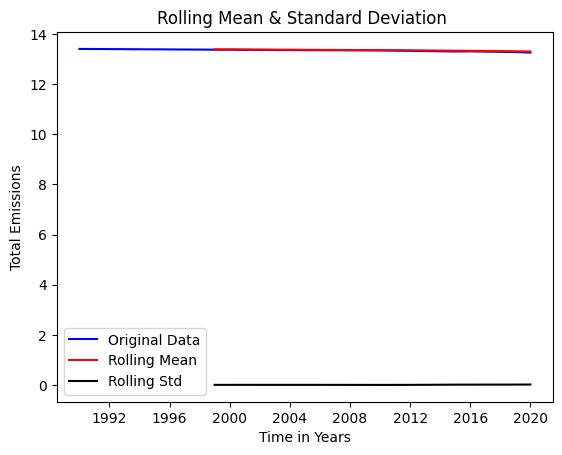

In [548]:
transport_series_log = np.log(transport_series) # apply log transform
test_stationary_plot(transport_series_log)

d. Decomposing: 
Decomposition provides a valuable tool for analyzing and forecasting time series data with trends and seasonality. By isolating these components, it helps in identifying underlying patterns, improving visualization, and making more accurate predictions.  

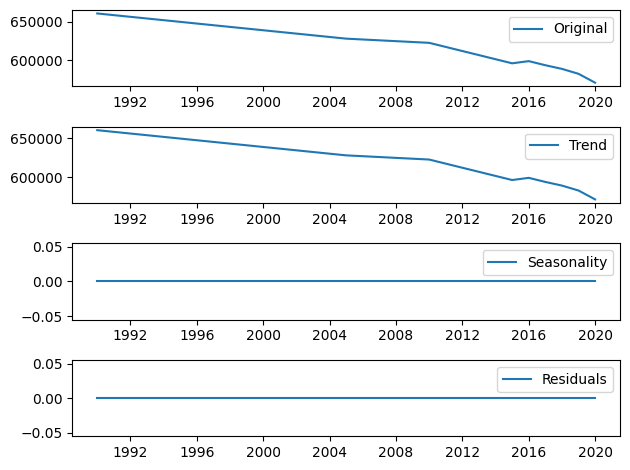

In [549]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(transport_series )

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(transport_series, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

The trend is downward indicating a general decreasing in co2 emissions. Flat residuals and seasonality indicate that the trend components explain most of the variability in the data. Lets check stationarity of trend:

 

Test Statistic                  1.045712
p-value                         0.994726
#Lags Used                      9.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


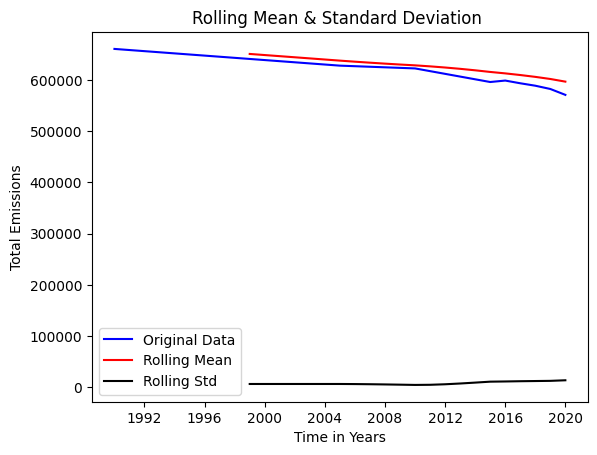

In [550]:
transport_series_decompose = trend
transport_series_decompose.dropna(inplace=True)
test_stationary_plot(transport_series_decompose)
 

#### How to determine the  optimal parameters for ARIMA model ? 
* Plot the ACF and PACF charts and find the optimal parameters:

ACF and PACF plot: is a bar chart of coefficients of correlation between a time series and it lagged values. By interpreting the ACF plot,an informed decisions could be made about the nature of the time series and about appropriate models for forecasting. Partial autocorrelations gives the partial correlation of a stationary time series with its own lagged values. PACF are useful in identifying the order of an autoregressive model. Both of them are valuable tools in the exploratory phase of time series analysis. 

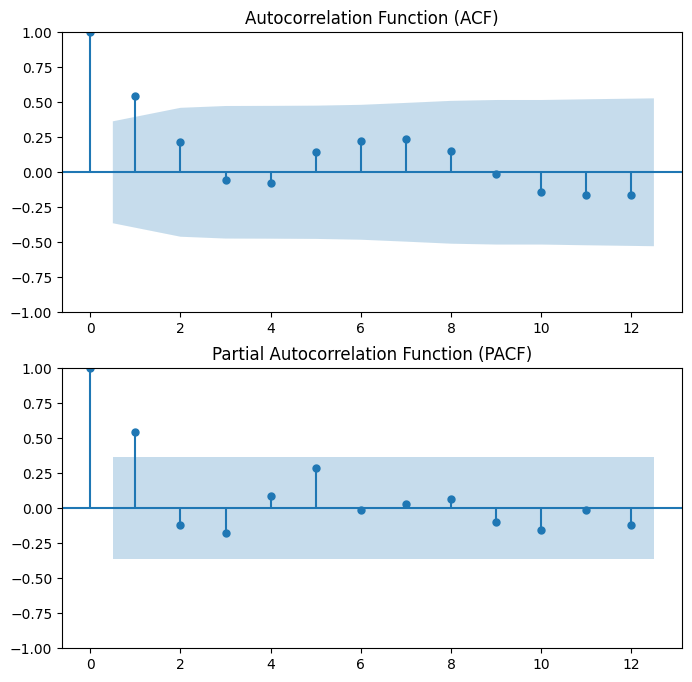

In [551]:
import statsmodels.api as sm
  
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# ACF plot
sm.graphics.tsa.plot_acf(transport_series_diff , lags=12, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

# PACF plot
sm.graphics.tsa.plot_pacf(transport_series_diff , lags=12, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.show()


(p and q) of the model could be determined by the autocorrelation and partial autocorrelation graphs. 

*  Grid search:
 
Involves systematically evaluating different combinations of the order parameter values (p, d, q)  to find the set of parameters that minimizes a chosen metric, such as the Mean Squared Error (MSE) or another performance metric.  

In [552]:
''' 
# grid search ARIMA parameters for time series
 

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

 

# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(transport_series_diff, p_values, d_values, q_values)'''

' \n# grid search ARIMA parameters for time series\n \n\n# evaluate an ARIMA model for a given order (p,d,q)\ndef evaluate_arima_model(X, arima_order):\n\t# prepare training dataset\n\ttrain_size = int(len(X) * 0.66)\n\ttrain, test = X[0:train_size], X[train_size:]\n\thistory = [x for x in train]\n\t# make predictions\n\tpredictions = list()\n\tfor t in range(len(test)):\n\t\tmodel = ARIMA(history, order=arima_order)\n\t\tmodel_fit = model.fit()\n\t\tyhat = model_fit.forecast()[0]\n\t\tpredictions.append(yhat)\n\t\thistory.append(test[t])\n\t# calculate out of sample error\n\trmse = sqrt(mean_squared_error(test, predictions))\n\treturn rmse\n\n# evaluate combinations of p, d and q values for an ARIMA model\ndef evaluate_models(dataset, p_values, d_values, q_values):\n\tdataset = dataset.astype(\'float32\')\n\tbest_score, best_cfg = float("inf"), None\n\tfor p in p_values:\n\t\tfor d in d_values:\n\t\t\tfor q in q_values:\n\t\t\t\torder = (p,d,q)\n\t\t\t\ttry:\n\t\t\t\t\trmse = evaluate

In [553]:
#Best ARIMA(10, 1, 3) RMSE=3368.610 transport_series_diff

In [650]:
from statsmodels.tsa.arima.model import ARIMA

transport_series_model = ARIMA(transport_series_diff, 
                               order=(10, 1, 3), 
                               enforce_stationarity=False,
                               enforce_invertibility=False)


transport_results = transport_series_model.fit()
print(transport_results.summary())

                               SARIMAX Results                                
Dep. Variable:              Transport   No. Observations:                   29
Model:                ARIMA(10, 1, 3)   Log Likelihood                -129.948
Date:                Sun, 07 Jan 2024   AIC                            287.895
Time:                        22:42:06   BIC                            300.360
Sample:                    01-01-1992   HQIC                           289.614
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7260      1.001      0.725      0.468      -1.237       2.689
ar.L2         -0.5427      1.695     -0.320      0.749      -3.865       2.780
ar.L3          0.4515      1.457      0.310      0.7

Evaluate: 

count      29.000000
mean     -299.137972
std      1408.298678
min     -5555.901438
25%      -280.082360
50%         5.582103
75%        92.035601
max      1580.176380
dtype: float64


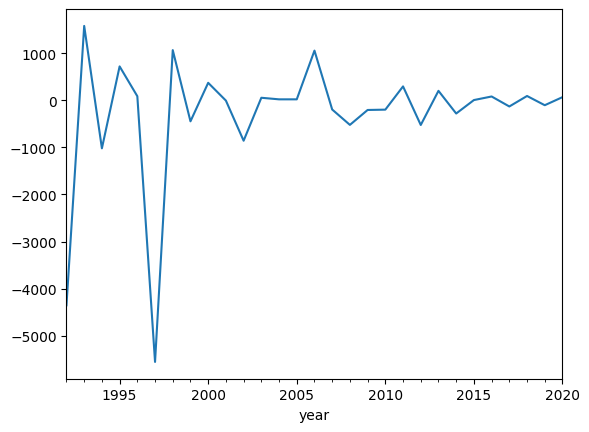

In [651]:
transport_results.resid.plot()
print(transport_results.resid.describe())
 


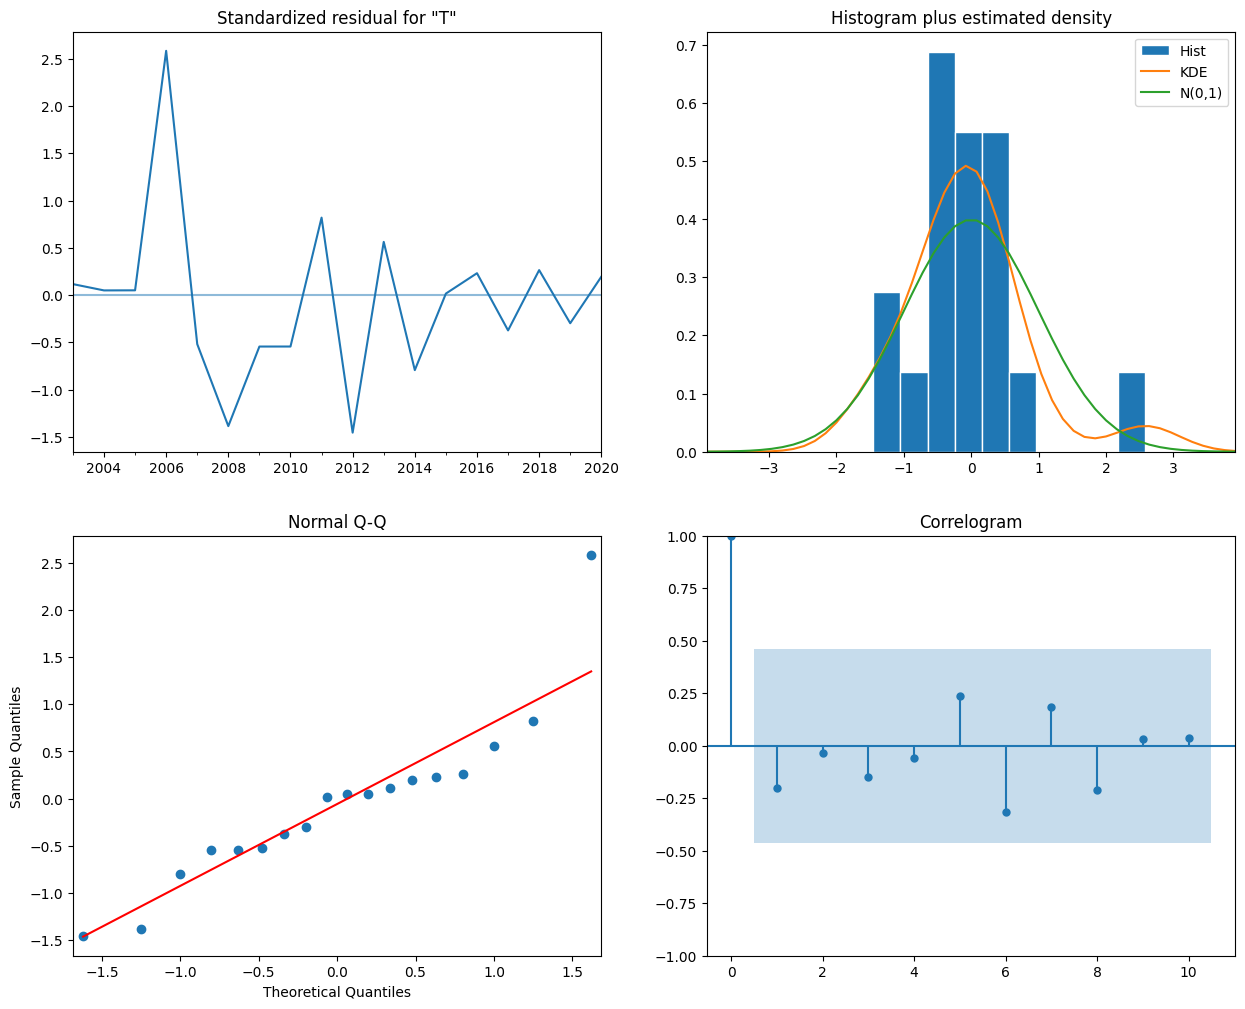

In [556]:
transport_results.plot_diagnostics(figsize=(15, 12))
plt.show()

#### Prediction:

The get_prediction() and conf_int() methods are used to get insights about the values and related confidence intervals to forecasts the time series.

In [557]:
prediction = transport_results.get_prediction(start = '2010', end = '2021', dynamic=False) #prediction
prediction_confidencei_nterval = prediction.conf_int()
prediction_confidencei_nterval.head(20)
# note that these numbers will be transformed back to its original values (invert) 

,lower Transport,upper Transport
2010-01-01,-2681.416890,-1256.451361
2011-01-01,-7396.319941,-5981.786505
2012-01-01,-10801.471280,-9390.593521
2013-01-01,-11523.031831,-10119.723190
2014-01-01,-11031.097704,-9648.565854
2015-01-01,-11316.615472,-9934.377013
2016-01-01,-3245.083571,-1862.445989
2017-01-01,-3021.138995,-1652.424788
2018-01-01,-10822.623522,-9455.677363
2019-01-01,-11719.403701,-10353.341075


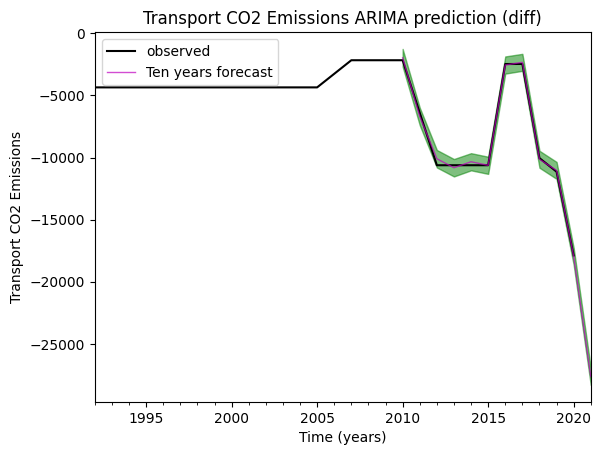

In [558]:
#plot predictions
ax = transport_series_diff['1990':].plot(label='observed' , color='k')
prediction.predicted_mean.plot(ax=ax, label='Ten years forecast', alpha=.7, color='m' , linewidth=1)

ax.fill_between(prediction_confidencei_nterval.index,
                prediction_confidencei_nterval.iloc[:, 0],
                prediction_confidencei_nterval.iloc[:, 1], color='g', alpha=.5, linewidth=1)

ax.set_xlabel('Time (years)')
ax.set_ylabel('Transport CO2 Emissions')
ax.set_title('Transport CO2 Emissions ARIMA prediction (diff)')

plt.legend()

plt.show()

As shown, the prediction has overall similar behavior as the true values.

 

besides the plot, it is useful to calculate MSE (Mean Squared Error) to figure out how accurate is the model. For each predicted value, the distance to the true value is computed and the result is squared to handle negative values.  

In [649]:
Transport_prediction = prediction.predicted_mean
Transport_truth = transport_series_diff['2019-01-01':]

# Compute the mean square error
mse = ((Transport_prediction- Transport_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((Transport_prediction -Transport_truth)**2)/len(Transport_prediction))))

The Mean Squared Error (MSE) of the forecast is 7671.19
The Root Mean Square Error (RMSE) of the forcast: nan


The Mean Squared Error (MSE) of the original transport_series forecast is
35,311,604.0 with order (1, 0, 1) depending on acf and pacf.
And, 13,723,108.74 with order ((8, 0, 3)) which obtained from Grid Search.

Comparing to only 7671.19  for transport_series_diff, the accuracy is much better.
 

In [560]:
Transport_pred_concat = pd.concat([Transport_truth, Transport_prediction])


The objective in building the model is to achieve a robust predictive capability, particularly through dynamic forecasting. In dynamic forecasting, information from the time series is utilized up to a specific moment, and subsequent forecasts are generated by incorporating values from previously forecasted time points.

In [561]:
prediction_dynamic = transport_results.get_prediction(start= '2019-01-01' , dynamic=True, full_results=True) #pred_dynamic represents the dynamic predictions obtained from the model
prediction_dynamic_conf_interval = prediction_dynamic.conf_int() #These intervals offer a range within which the true values are likely to fall

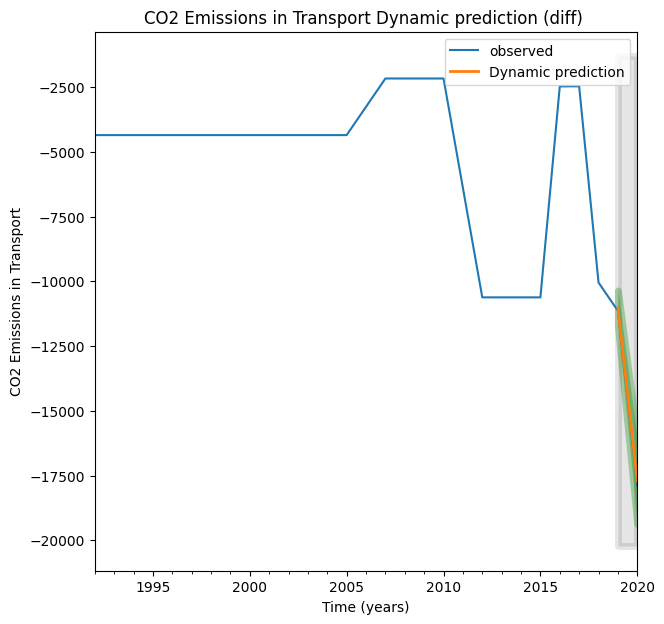

In [562]:

ax = transport_series_diff['1990':].plot(label='observed', figsize=(7, 7))

prediction_dynamic.predicted_mean.plot(label='Dynamic prediction', ax=ax , linewidth=2)

ax.fill_between(prediction_dynamic_conf_interval.index,
                prediction_dynamic_conf_interval.iloc[:, 0],
                prediction_dynamic_conf_interval.iloc[:, 1], 
                color='g',
                linewidth=5, 
                alpha=.3)

ax.fill_betweenx(ax.get_ylim(), 
                 pd.to_datetime('2019'), 
                 transport_series.index[-1],
                 alpha=.1, zorder=-1,
                 linewidth=5,
                 color='k')


ax.set_xlabel('Time (years)')
ax.set_ylabel('CO2 Emissions in Transport')
ax.set_title('CO2 Emissions in Transport Dynamic prediction (diff) ')
plt.legend()
plt.show()

From plotting the observed and predected values of the time series, it is clear that it is accurate even when the dynamic prediction is used. The  predicted value (orange line) is close  to the original observed (blue line) data, and fall within the confidence intervals (green area)  .

In [563]:
# Extract the predicted and true values of the time series
transport_dynamic = prediction_dynamic.predicted_mean
transport_orginal = transport_series_diff['2019-01-01':]

# Compute the mean square error
mse = ((transport_dynamic - transport_orginal) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((transport_dynamic -transport_orginal)**2)/len(transport_dynamic))))

The Mean Squared Error (MSE) of the forecast is nan
The Root Mean Square Error (RMSE) of the forcast: nan


#### Forecasting:


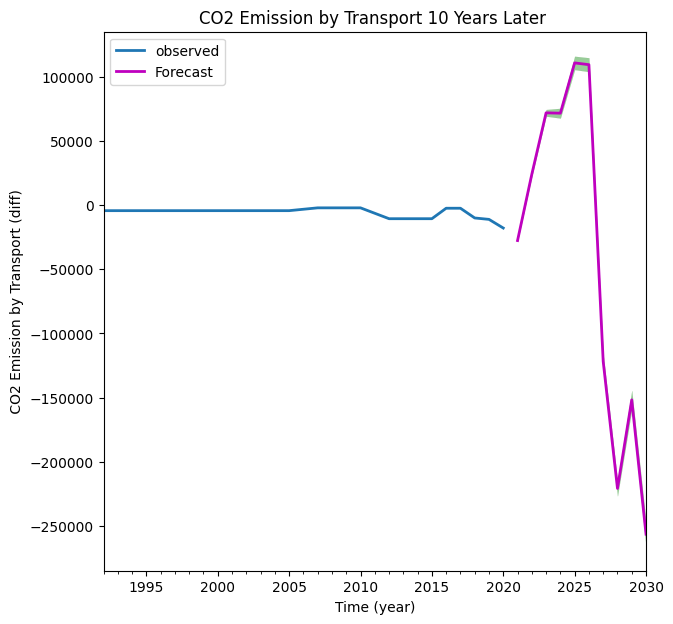

In [564]:

# Get forecast of 10 years  in future
forecast = transport_results.get_forecast(steps= 10)
# Get confidence intervals of forecasts
forecast_conf_interval = forecast.conf_int()
#forecast_conf_interval.head(20)

#plot
ax = transport_series_diff.plot(label='observed', figsize=(7, 7) , linewidth=2)

forecast.predicted_mean.plot(ax=ax, label='Forecast', color='m' , linewidth=2)

ax.fill_between(forecast_conf_interval.index,
                forecast_conf_interval.iloc[:, 0],
                forecast_conf_interval.iloc[:, 1], color='g', alpha=.4 , linewidth=0.1)

ax.set_xlabel('Time (year)')
ax.set_ylabel(' CO2 Emission by Transport (diff) ')
ax.set_title("CO2 Emission by Transport 10 Years Later ")
plt.legend()
plt.show()
# please not the shape of the data set is changed after diff() transform.
# To achive stationarity, the visual inspection has been ignored,
# the metric for stationarity is p-value from  statistics  test. #issue

The forecast shows that the CO2 emission from Transport sector is expected to continue decreasing.

#### Transform back from diff() to cumsum():

Finally, the differenced sirese is inverted back to check the real numbers

In [643]:
# To inverse the results
def diff_inverse(series_diff, first_value): #++ first_element_original
    series_inverted = np.r_[first_value,series_diff].cumsum().astype('float64')
    return series_inverted

 

In [645]:
#call inverse predictions
inversed_series = diff_inverse(transport_results.fittedvalues, transport_series[0])
#convert to df
predicted_original_df= pd.DataFrame(  )
  
 
  

In [646]:
predicted_original_df.index = transport_series.iloc[0:30].index
predicted_original_df["predicted"] = inversed_series
predicted_original_df["Original"] = transport_series.iloc[0:30]

In [647]:
predicted_original_df


,predicted,Original
year,,
1990-01-01,660748.806226,660748.806226
1991-01-01,660748.806226,658572.345093
1992-01-01,654815.707580,656395.883960
1993-01-01,651482.747789,654219.422827
1994-01-01,646409.495019,652042.961694
1995-01-01,641969.547410,649866.500561
1996-01-01,643172.526582,647690.039429
1997-01-01,637753.448141,645513.578296
1998-01-01,633846.330825,643337.117163


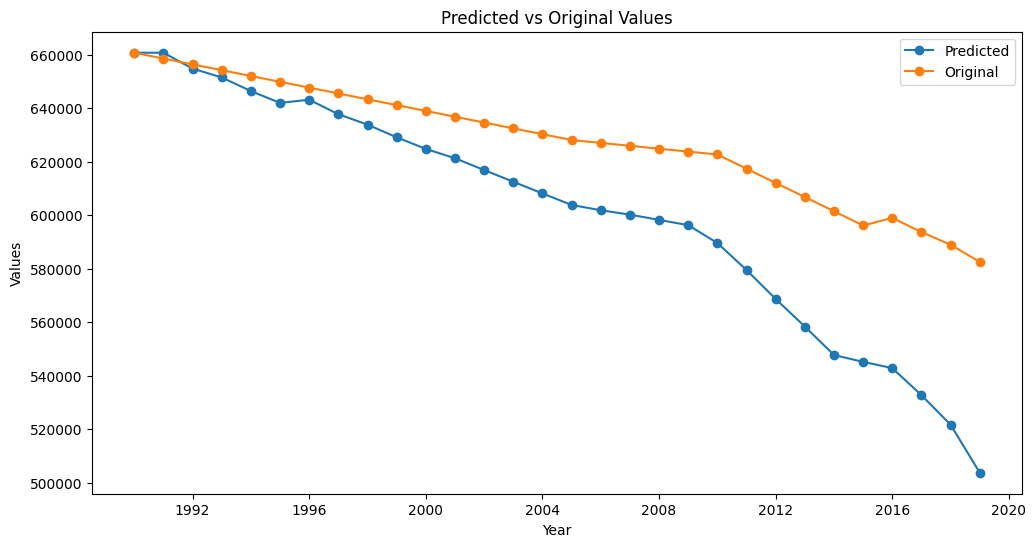

In [648]:
 

 
plt.figure(figsize=(12, 6))
plt.plot(predicted_original_df.index, predicted_original_df['predicted'], label='Predicted', marker='o')
plt.plot(predicted_original_df.index, predicted_original_df['Original'], label='Original', marker='o')
plt.title('Predicted vs Original Values')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.show()


### 2.2 Apply ARIMA on the co2_emissions_log dataset:

The main goal in this section is to apply ARIMA on dataFrame with several columns and explore its attributes. 

Regarding  the log transform, the results from ADF algorithm state that the dataset is not stationary. Also, when applying different transformation techniques, some columns become stationary and the others are not. For simplicity, and for visual convenient  (as shown in plot test below), it has been determined to continue with  log transform.

In [576]:
co2_emissions_log = np.log(co2_emissions_extended) # apply log transform
 

MissingDataError: exog contains inf or nans

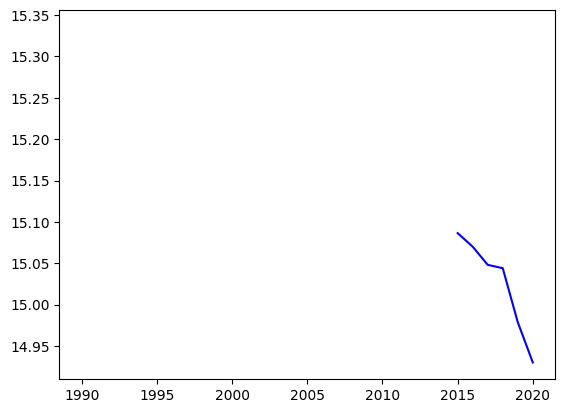

In [577]:
# It could be used for all of the columns through a loop, lets visualize one for simplicity
test_stationary_plot(co2_emissions_log["Total_co2"])

As shown, the graph is very smooth but the statistics state non-stationarity. In contrast of the previous example in **Transport** where the series is stationary but the graph is fluctuated

Next, 

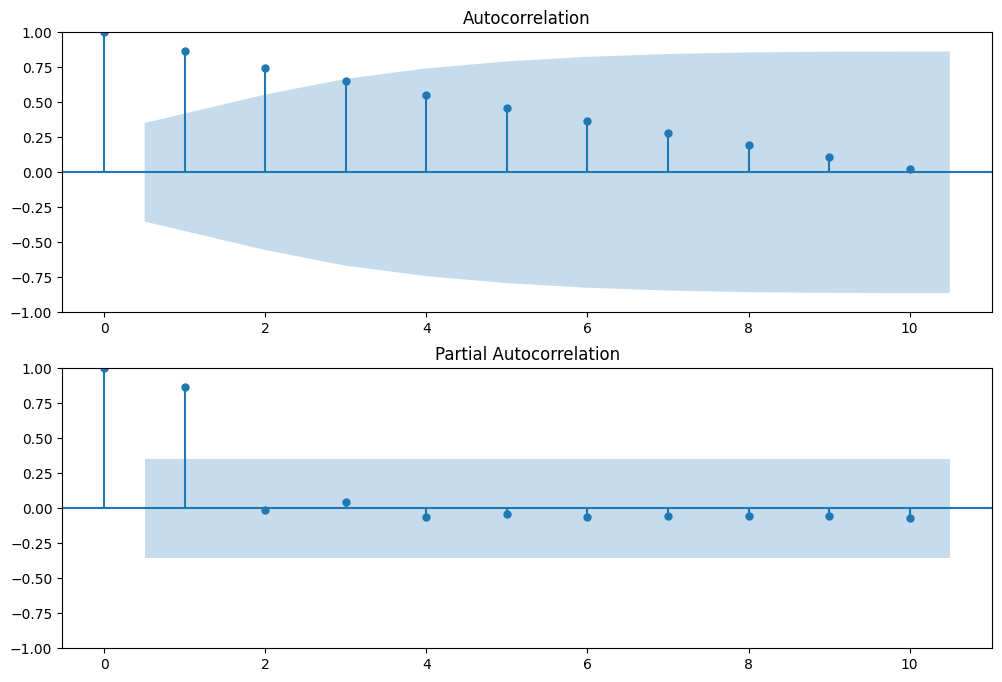

In [ ]:
'''for clm in co2_emissions_log.columns:
 #to plot all the columns
   fig = plt.figure(figsize=(12,8))
    
   ax1 = fig.add_subplot(211)
   fig = sm.graphics.tsa.plot_acf( co2_emissions_log[clm] , lags=10, ax=ax1)
   ax2 = fig.add_subplot(212)
   fig = sm.graphics.tsa.plot_pacf(co2_emissions_log[clm] , lags=10, ax=ax2)'''


#to plot one column, it is enough
fig = plt.figure(figsize=(12,8)) 
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf( co2_emissions_log["Total_co2"] , lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(co2_emissions_log["Total_co2"] , lags=10, ax=ax2)

The autocorrelation function shows a slow decay, which means that the future values have a very high correlation with its past values. The partial autocorrelation function shows a high correlation with the first lag, we could start our modeling with an AR(2) model and compare this with an AR(3).

#### Applying ARIMA 

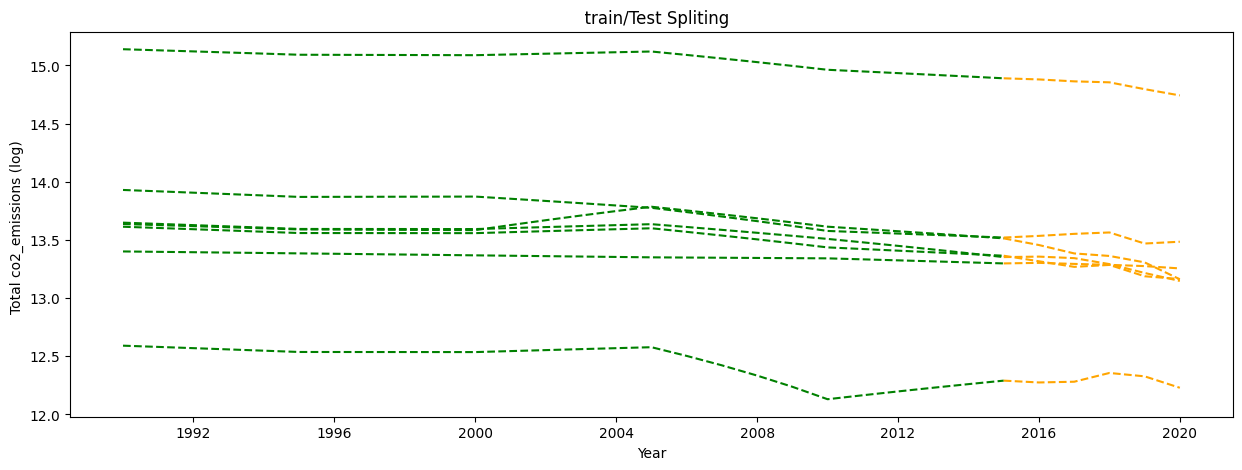

In [ ]:
# in this sectin, the dataset is devided into train/test 
# split into train and test sets, The split is coherent and not random,
# this is a common practice in time series forecasting to maintain temporal order. 

train = co2_emissions_log.loc['1990':'2015']
test = co2_emissions_log.loc['2015':'2021']

# Creating a line plot
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the entire dataset
#ax.plot(co2_emissions_log.index, co2_emissions_log, label='Entire Dataset', linestyle='-', color='blue')

# Highlight the training set
ax.plot(train.index, train, label='Training Set', linestyle='--', color='green')

# Highlight the test set
ax.plot(test.index, test, label='Test Set', linestyle='--', color='orange')

# Adding a vertical dashed line at '01-01-2015'
#ax.axvline('2015', color='black', ls='--')

# Adding legend and labels
#ax.legend()
ax.set_title('  train/Test Spliting')
ax.set_xlabel('Year')
ax.set_ylabel('Total co2_emissions (log) ')

# Displaying the plot
plt.show()




In [ ]:

# The ARIMA model order is specified as (p, d, q),
# p is the order of the autoregressive (AR) component, 
# d is the degree of differencing, 
# q is the order of the moving average (MA) component.

order = (1, 1, 1)  # <- plug-in p, d, q here# based on grid search or acf and pacf

history = [x for x in train]

#Predictions are stored in forecast_results and predictions DataFrames.

# Create a DataFrame to save forecast results
start_date = '2020-01-01'
end_date = '2025-01-01'
date_range = pd.date_range(start=start_date, end=end_date, freq='AS-JAN')
forecast_results = pd.DataFrame(index=date_range, columns=train.columns)
results = pd.DataFrame(index=train.index, columns=train.columns)

# Create an empty DataFrame for predictions
predictions = pd.DataFrame(  )  


# walk-forward validation
for clm in train.columns:
        # fit model
    log_model = ARIMA(co2_emissions_log[clm], order=order)
    log_model_fit = log_model.fit()
    results[clm]= log_model_fit


##### Evaluate the model:

In [ ]:
#     "results" DataFrame contain ARIMA model results for each column
plot_list = []
for clm in results.columns:
    model_result = results[clm].iloc[-1]  # Get the ARIMA model result for the last row
    all_prediction = model_result.get_prediction(start='2010', end='2020', dynamic=False)
    plot_list.append(all_prediction)
    all_prediction_confidence_interval = all_prediction.conf_int()
    
    predictions[clm  ] = all_prediction_confidence_interval.iloc[:, 0] #chosse the lower prediction and save them for simplicity
    #predictions[clm + '_lower'] = all_prediction_confidence_interval.iloc[:, 0]
    #predictions[clm + '_upper'] = all_prediction_confidence_interval.iloc[:, 1]

 


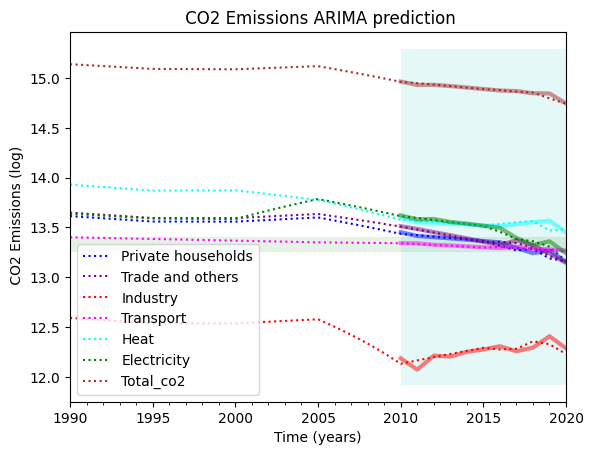

In [ ]:
#plot predictions for all columns
colors = ['blue','purple','red','magenta','cyan','green','brown']


ax = co2_emissions_log['1990':].plot(label='observed' , color=colors , linestyle='dotted')

for i in range(len(plot_list)):
    plot_list[i].predicted_mean.plot(ax=ax, label='Prediction', alpha=.5, color=colors[i] , linewidth=3)

ax.fill_betweenx(ax.get_ylim(), 
                 pd.to_datetime('2010'), 
                 co2_emissions_log.index[-1],
                 alpha=.1, zorder=-1,
                 linewidth=0.1,
                 color='c')

ax.fill_betweenx(co2_emissions_log['Transport'],# highlight Transport clm
                   
                 co2_emissions_log.index[-1],
                 alpha=.1, zorder=-1,
                 linewidth=0.1,
                 color='g')

ax.set_xlabel('Time (years)')
ax.set_ylabel(' CO2 Emissions (log)')
ax.set_title(' CO2 Emissions ARIMA prediction')

#plt.legend(bbox_to_anchor=[1,1])

plt.show()

From the graph, it is clear that all columns follow the training data pattern.

Then, application of dynamic prediction followed by ploting the results. 

In [ ]:

dynamic_plot_list = []
for clm in results.columns:
    model_result_dynamic = results[clm].iloc[-1]  # Get the ARIMA model result for the last row
    all_prediction_dynamic = model_result_dynamic.get_prediction(start= '2019-01-01' , dynamic=True, full_results=True) #pred_dynamic represents the dynamic predictions obtained from the model
    dynamic_plot_list.append(all_prediction_dynamic)
    all_prediction_dynamic_conf_interval = all_prediction_dynamic.conf_int() #These intervals offer a range within which the true values are likely to fall
    #predictions[clm + '_dynamic_prediction'] = all_prediction_dynamic_conf_interval.iloc[:, 0] #chosse the lower prediction and save them for simplicity


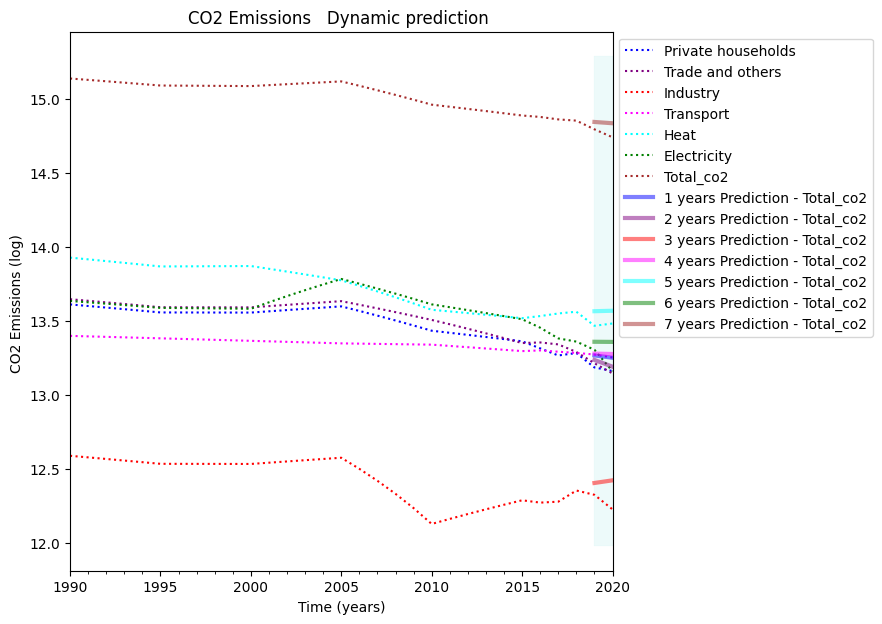

In [ ]:
colors = ['blue','purple','red','magenta','cyan','green','brown']


ax = co2_emissions_log['1990':].plot(label='observed', figsize=(7, 7) ,  color=colors , linestyle='dotted')

for i in range(len(dynamic_plot_list)):
    dynamic_plot_list[i].predicted_mean.plot(ax=ax, label='Ten years Prediction', alpha=.5, color=colors[i] , linewidth= 3)
   
    
    #dynamic_plot_list[i].predicted_mean.plot(label='Dynamic prediction', ax=ax , linewidth=2 , color=colors[i] )


ax.fill_betweenx(ax.get_ylim(), 
                 pd.to_datetime('2019'), 
                 co2_emissions_log.index[-1],
                 alpha=.07, zorder=-1,
                 linewidth=0.2,
                 color='c')


ax.set_xlabel('Time (years)')
ax.set_ylabel('CO2 Emissions (log) ')
ax.set_title('CO2 Emissions   Dynamic prediction ')
#plt.legend(bbox_to_anchor=[1,1] )
plt.show()

From plotting the observed and predected values of the time series, it is clear that it is accurate even when we use the dynamic prediction. The predicted value (thick lines) is close to the original observed (dotted line) data.

#### Evaluate The model

Mean Squared Error (MSE): 0.014015288782367309
Mean Absolute Error (MAE): 0.094722777844814
Root Mean Squared Error (RMSE): 0.11838618493036808


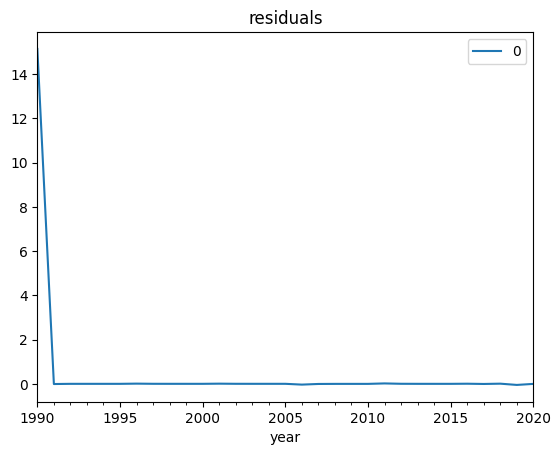

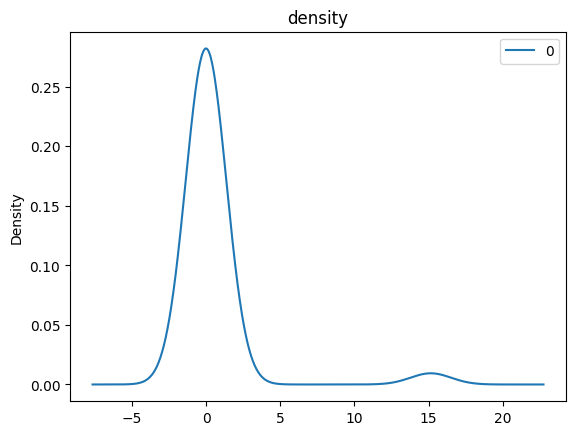

               0
count  31.000000
mean    0.486062
std     2.719596
min    -0.049713
25%    -0.002310
50%    -0.000418
75%     0.001079
max    15.139537


In [ ]:

# here we can use  sklearn.metrics for accuracy calculation

mse = mean_squared_error(test, predictions.iloc[0:6])
mae = mean_absolute_error(test, predictions.iloc[0:6])
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


 
residuals = pd.DataFrame(log_model_fit.resid)
residuals.plot(title='residuals')
plt.show()
# density plot of residuals
residuals.plot(kind='kde', title='density')
plt.show()
# summary stats of residuals
print(residuals.describe())


Overall, mse, mae and rmse values  suggest that  ARIMA forecasting model is performing relatively well.
The low values for these metrics indicate that, on average, the difference between the predicted and actual values is small.

The residuals suggest that the ARIMA model is not perfectly-fitting. This could be solved with appropriate data engineering  in the future 

#### Forcating:

In [ ]:
forcast_frame=  pd.DataFrame() #new dataframe to save the forcast for each clm

In [ ]:
# Get forecast of 10 years in the future
forcast_plot_list = []
 

for clm in results.columns:
    forcast_result = results[clm].iloc[-1]  # Get the ARIMA model result for the last row
    forecast = forcast_result.get_forecast(steps=10)
    forcast_plot_list.append(forecast)  # List for plot later

    all_forcast_conf_interval = forecast.conf_int()
    if clm == 'Transport': # save Transport  _forcast_conf_interval
        Tran_forcast_conf_interval = all_forcast_conf_interval
    forcast_frame[clm ] = all_forcast_conf_interval.iloc[:, 0]    # Add lower forecast values to the forcast_frame  DataFrame (just for hope:))



In [ ]:
Tran_forcast_conf_interval = np.exp(Tran_forcast_conf_interval) #inverse log is exp

In [ ]:
Tran_forcast_conf_interval

,lower Transport,upper Transport
2021-01-01,558164.759904,568093.325103
2022-01-01,548595.934475,568676.311796
2023-01-01,541304.149022,570912.785322
2024-01-01,535577.701503,573854.019985
2025-01-01,530923.024696,577038.307137
2026-01-01,527012.510919,580241.235124
2027-01-01,523630.565786,583358.575437
2028-01-01,520634.512558,586347.426639
2029-01-01,517928.651001,589195.710751
2030-01-01,515447.580573,591906.201486


To invert the logarithmic transformation and get back the original values, the exponential function is used.

In [ ]:
# Convert the training set, prediction, and forecast back to their original scale
exp_train = np.exp(train)
exp_pred = np.exp(predictions)
exp_forcast = np.exp(forcast_frame)


Converting the data back to its original scale after logarithmic transformation using exp is necessary to gain a more meaningful understanding of the underlying patterns and the actual impact of CO2 emissions.

In [ ]:
all_data =  pd.concat( [np.exp(train) , np.exp(predictions)   ,   np.exp(forcast_frame)], axis=0)    #inverse log is exp


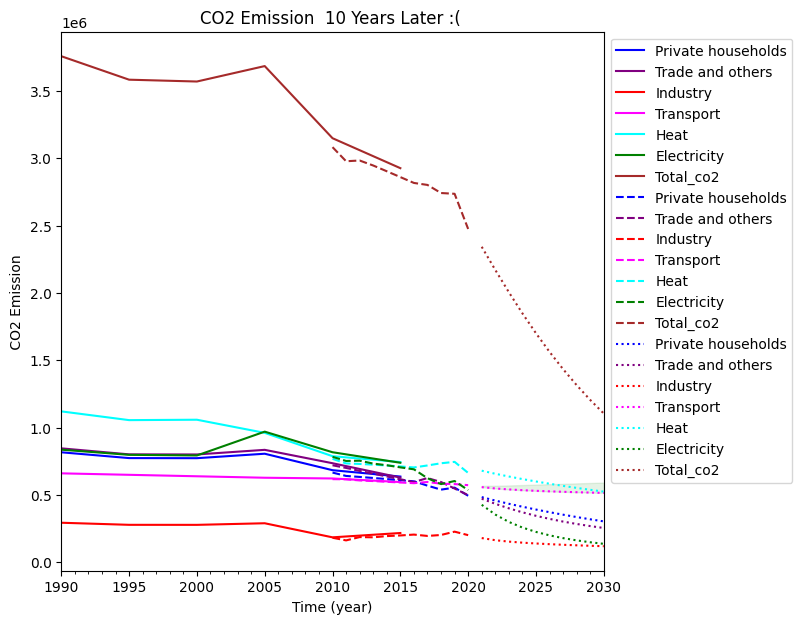

In [ ]:
 

colors = ['blue','purple','red','magenta','cyan','green','brown']

ax = exp_train.plot(label='observed', figsize=(7, 7) , color=colors , linestyle='-' )

exp_pred.plot(ax = ax ,label='predected', color=colors , linestyle='--')

exp_forcast.plot(ax = ax , label='forcasted'  , color=colors ,  linestyle='dotted')


ax.fill_between(Tran_forcast_conf_interval.index,
                Tran_forcast_conf_interval.iloc[:, 0],
                Tran_forcast_conf_interval.iloc[:,-1], color='g', alpha=.1)

ax.set_xlabel('Time (year)')
ax.set_ylabel(' CO2 Emission ')
ax.set_title("CO2 Emission  10 Years Later :( ")
#plt.legend()
ax.legend(bbox_to_anchor=[1,1])
plt.show()

The forecast here shows that the CO2 emission is expected to continue decreasing in all of the sectors, Additionally, comparing to the **transport_series_model** model, the **transport** sector forecast does fall inside the confidence interval for the most recent years. This suggests that the model is performing well. 

Despite the limitations, this forcast can provide valuable insights into potential future trends and help inform decision-making processes. By understanding the predicted trends and associated uncertainties, we can develop strategies to mitigate the potential impact of rising emissions and promote sustainable practices.

In [ ]:
# Save the models :)

transport_results.save('transport_series_model.pkl')


## Conclusion: 


This report has demonstrated the power of data engineering and time series analysis to shed light on renewable energy production and CO2 emissions trends. By transforming, analyzing, and applying ARIMA models to the data.

It highlights the need for continued monitoring and implementation of policies that encourage cleaner energy sources and sustainable practices. It is also recommended  to explore  opportunities for further improvements in sectors showing slower declines, such as private households, trade+other, and traffic.
 
In future work, extending ARIMA to multivariate time series analysis, incorporating renewable energy production data to gain a deeper understanding of its impact on CO2 emission patterns. This approach will further enhance the ability to make informed decisions and accelerate the transition to a sustainable future.

By combining data-driven insights with proactive policy measures and collaborative efforts, the challenges of CO2 emissions could be addressed effectively.

## Refrences: 

* https://www.alt-bau-neu.de/kreis-borken/abnwaermepumpen-29087.asp  

* https://www.swd-ag.de/magazin/wasserkraft/ 

* https://www.stadt-muenster.de/klima/foerderprogramm/photovoltaik

* https://farwick-muehlenbau.de/biogasanlagen-unser-beitrag-zu-erneuerbaren-energien/

* https://www.plenter.ms/shk/heizung/heizsysteme/kamine-oefen/brennstoffe/pellets

* https://www.heizungsbau.net/magazin/scheitholzheizung-20204393 
 
* https://climatefalsesolutions.org/landfill-gas-to-energy/  

* https://www.swd-ag.de/magazin/wasserkraft/   

* https://orsted.de/gruene-energie/energie-lexikon/co2-emissionen

* https://www.energy.gov/eere/renewable-energy

* https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc442.htm

* https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

* https://www.kaggle.com/code/sunaysawant/power-consumption-time-series-arima

* https://www.kdnuggets.com/2023/08/leveraging-xgboost-timeseries-forecasting.html#:~:text=Often%20the%20use%20cases%20are,can%20predict%20future%20numerical%20values.

* https://www.kaggle.com/code/stuarthallows/using-xgboost-with-scikit-learn

* https://wandb.ai/madhana/Time_Series/reports/Python-Time-Series-Forecasting-A-Practical-Approach--VmlldzoyODk4NjUz#:~:text=There%20are%20several%20techniques%20to,data%20is%20likely%20non%2Dstationary.


* https://www.analyticsvidhya.com/blog/2021/06/statistical-tests-to-check-stationarity-in-time-series-part-1/

* https://www.kaggle.com/code/berhag/co2-emission-forecast-with-python-seasonal-arima
